In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud #for text data visualixation

TensorFlow is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.
  In Deep Learning, Recurrent Neural Networks (RNN) are a family of neural networks that excels in learning from sequential data. A class of RNN that has found practical applications is Long Short-Term Memory (LSTM) because it is robust against the problems of long-term dependency.
  LSTM is mostly used in scenarios where we have no idea of the time duration and we need to process, classify and predict the series of time it will take. The use of the LSTM is mostly used for remembering the post data inside the system memory that is also considered as the updated or modified version of RNN that is a Recurrent neural network that makes the work of remembering easy.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer #used to tokenize the text data
from tensorflow.keras.preprocessing.sequence import pad_sequences #used to pad those datasets which are not long enough
from tensorflow.keras.models import Sequential #for feeding the model layers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split #used to split dataset into train set and test set
from sklearn.metrics import classification_report, accuracy_score #used to measure the performance

In [ ]:
fake= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts() #how many subjects of data are there

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


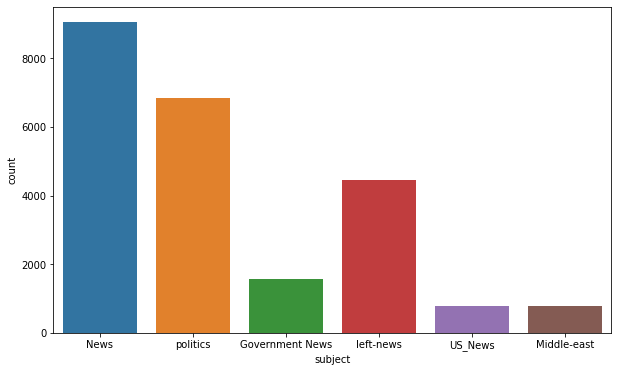

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=fake)

In [ ]:
text =' '.join(fake['text'].tolist())

In [ ]:
wordcloud= WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
text =' '.join(real['text'].tolist())

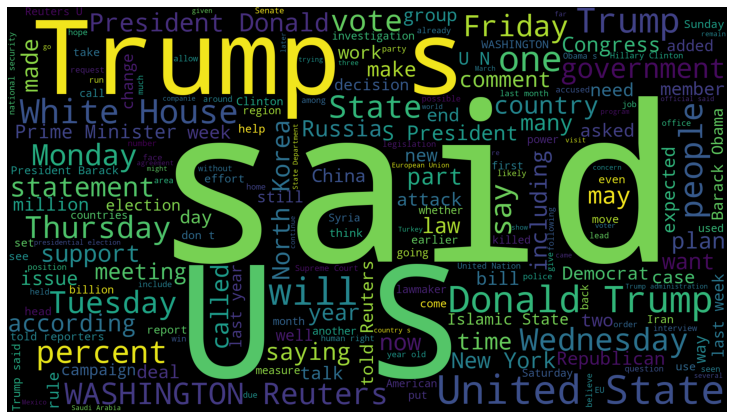

In [ ]:
wordcloud= WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**CLEANING DATA**

In [ ]:
real.sample(15)

,title,text,subject,date
10523,2008 Republican nominee John McCain joins Romn...,WASHINGTON (Reuters) - U.S. Senator John McCai...,politicsNews,"March 3, 2016"
13194,Corsica's nationalists press for autonomy talk...,"AJACCIO, France (Reuters) - Corsican nationali...",worldnews,"December 4, 2017"
3032,"Trump says Obama 'colluded' on Russia, without...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 26, 2017"
8645,Obama's brother plans to vote for Trump,NAIROBI (Reuters) - President Barack Obama’s ...,politicsNews,"July 25, 2016"
19489,New Zealand jet fuel rations increased as gove...,WELLINGTON (Reuters) - New Zealand will partia...,worldnews,"September 21, 2017"
7177,Top Senate Democrat cites civil rights concern...,WASHINGTON (Reuters) - Incoming U.S. Senate De...,politicsNews,"November 18, 2016"
20418,Azeri court releases head of independent Azeri...,BAKU (Reuters) - An Azeri court on Monday rele...,worldnews,"September 11, 2017"
17008,War criminal or role model? It's a thin line i...,"LJUBLJANA/BELGRADE (Reuters) - In 2009, Serbia...",worldnews,"October 19, 2017"
17358,Iraq warns Kurdistan not to shut down Kirkuk o...,BAGHDAD (Reuters) - Iraq said on Monday it was...,worldnews,"October 16, 2017"
16537,"Troops and strays, the only signs of life in r...","MARAWI CITY, Philippines (Reuters) - With vehi...",worldnews,"October 25, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record=row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher=[]
tmp_text=[]

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text']=real['title']+ " "+real['text']
fake['text']=fake['title']+ " "+fake['text']

In [ ]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

**Preprocessing Data**

In [ ]:
real['class']=1
fake['class']=0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real=real[['text','class']]
fake=fake[['text','class']]

In [ ]:
data=real.append(fake, ignore_index=True)


In [ ]:
data.sample(5)

,text,class
15106,eu parliament questions independence of police...,1
20740,syrian opposition leader says u.n. mediation h...,1
12329,putin says will run as independent candidate f...,1
31407,lol! comedian joe piscopo warns statue haters:...,0
1835,new senate obamacare repeal bill due monday: s...,1


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 29.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-4_aew7cw
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-4_aew7cw
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11755 sha256=d97fea7c303176d86943c9eb

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text']=data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


**Vectorization**

In [ ]:
import gensim

In [ ]:
y=data['class'].values

In [ ]:
X=[d.split() for d in data['text'].tolist()]

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model= gensim.models.Word2Vec(sentences= X, size= DIM, window= 10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

231872

In [ ]:
w2v_model.wv.most_similar('trump')

[('trumps', 0.7379102110862732),
 ('trumpthe', 0.5676436424255371),
 ('he', 0.555371880531311),
 ('trumptrump', 0.5400830507278442),
 ('him', 0.5373489856719971),
 ('presidentelect', 0.5351425409317017),
 ('rumsfeld', 0.5198230147361755),
 ('trumphere', 0.5029749870300293),
 ('proportionsonce', 0.49381139874458313),
 ('businessmanturnedpresidential', 0.4931591749191284)]

In [ ]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X)#The fit_on_texts method is a part of Keras tokenizer class which is used to update the internal vocabulary for the texts list. We need to call be before using other methods of texts_to_sequences or texts_to_matrix.

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

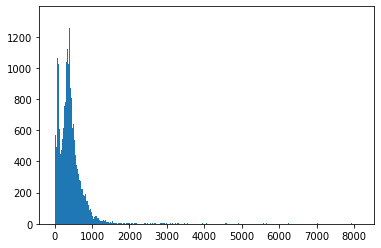

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[0])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i]=model.wv[word]
  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length=maxlen, trainable= False))
model.add(LSTM(units=128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23187300  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 45s 59ms/step - loss: 0.1497 - acc: 0.9457 - val_loss: 0.1040 - val_acc: 0.9694
Epoch 2/6
737/737 [==============================] - 43s 58ms/step - loss: 0.0778 - acc: 0.9739 - val_loss: 0.0658 - val_acc: 0.9788
Epoch 3/6
737/737 [==============================] - 43s 58ms/step - loss: 0.0603 - acc: 0.9793 - val_loss: 0.0425 - val_acc: 0.9861
Epoch 4/6
737/737 [==============================] - 43s 59ms/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0359 - val_acc: 0.9883
Epoch 5/6
737/737 [==============================] - 43s 58ms/step - loss: 0.0155 - acc: 0.9952 - val_loss: 0.0410 - val_acc: 0.9882
Epoch 6/6
737/737 [==============================] - 43s 58ms/step - loss: 0.0103 - acc: 0.9973 - val_loss: 0.0283 - val_acc: 0.9914


In [ ]:
y_pred= (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 8s 21ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9915367483296214

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5869
           1       0.99      0.99      0.99      5356

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
X_test

array([[    0,     0,     0, ...,   598,    38,    15],
       [    0,     0,     0, ...,   197,   175,   264],
       [    0,     0,     0, ...,   540,     3, 11122],
       ...,
       [    0,     0,     0, ...,    17,     4,   247],
       [    0,     0,     0, ...,   220,  3589,  8082],
       [  139,  9730,    11, ...,  3033,  1097,    93]], dtype=int32)

In [ ]:
x=['As the North Atlantic Treaty Organization (NATO) celebrates its 70th anniversary this month, Americans overwhelmingly say being a member of NATO is beneficial for the United States.']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 46ms/step


array([[1]])